In [1]:
%run rs2th_cwt_functions.ipynb

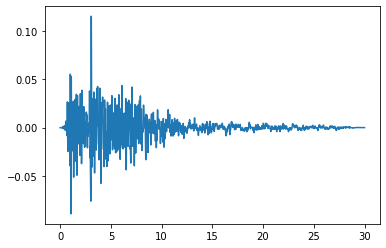

In [2]:
# Read Acc. th
data = fileI('RSN454_MORGAN_GIL067.AT2');
th = np.zeros(len(data)*5);
idx = 0;
for i in range(len(data)):
    for j in range(5):
        th[idx] = data[i,j];
        idx += 1;
dt = 0.005;
N = len(th);
tmax = dt*N;
time = np.arange(0,tmax,dt);
plt.plot(time,th);

In [3]:
# RG 1.60
ft = np.array([0.10,  2.50, 9.00, 33.0, 100.0]);  # frequency table
rt = np.array([0.07,  3.13, 2.61,  1.0,   1.0]);  # response spectrum table

# log-log interp
freq = np.logspace(-1,2,100);
resp_spec = 10**np.interp(np.log10(freq),np.log10(ft),np.log10(rt));
resp_spec_u = resp_spec*1.3;
resp_spec_l = resp_spec/1.1;

In [4]:
freq,rs = srs_sw_pa(freq,th,dr=0.05,dt=dt);

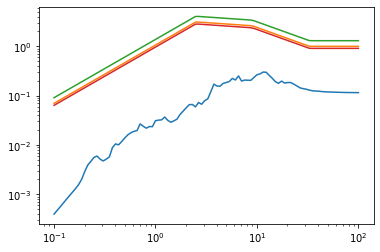

In [6]:
plt.loglog(freq,rs);
plt.loglog(freq,resp_spec);
plt.loglog(freq,resp_spec_u);
plt.loglog(freq,resp_spec_l);

In [7]:
m=freq[:-1]
n=freq[1:]
f_points = (m+n)/2
resp1 = 10**np.interp(np.log10(f_points),np.log10(ft),np.log10(rt));
resp2 = 10**np.interp(np.log10(f_points),np.log10(freq),np.log10(rs));
cof = resp1/resp2;

In [8]:
# Wavelet Decomosition
a_out,ab_out,w_out,wb_out = cwt_newland1(ft=freq,k=100,time=time,th=th);

In [9]:
# Reconstruction with adjustment
a,ab,w,wb = a_out,ab_out,w_out,wb_out
lenm = len(a[:,0]);
lenk = len(a[0,:]);
lent = len(w[0,:,0]);
th1 = np.zeros(lent,'complex');
for i in range(lenm):
    for j in range(lenk):
        th1 += cof[i]*(a[i,j]*w[i,:,j]+ab[i,j]*wb[i,:,j]);

In [10]:
freq,rs1 = srs_sw_pa(freq,th1,dr=0.05,dt=dt);

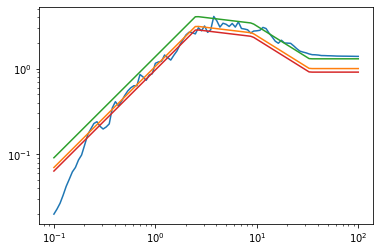

In [11]:
plt.loglog(freq,rs1);
plt.loglog(freq,resp_spec);
plt.loglog(freq,resp_spec_u);
plt.loglog(freq,resp_spec_l);

In [17]:
new_th = th1*(np.linalg.norm(th)/np.linalg.norm(th1));

C:\Users\OWNER\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\OWNER\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\OWNER\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\OWNER\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


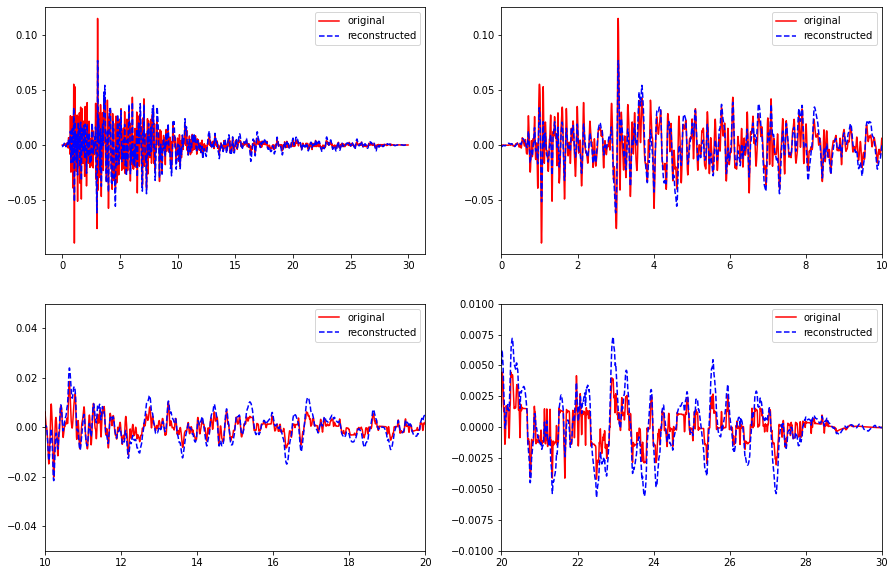

In [18]:
plt.figure(figsize=(15,10));
plt.subplot(221);
plt.plot(time,th,color='red',linestyle='solid',label='original');
plt.plot(time,new_th,color='blue',linestyle='dashed',label='reconstructed');
plt.legend();
plt.subplot(222);
plt.plot(time,th,color='red',linestyle='solid',label='original');
plt.plot(time,new_th,color='blue',linestyle='dashed',label='reconstructed');
plt.xlim(0,10);
plt.legend();
plt.subplot(223);
plt.plot(time,th,color='red',linestyle='solid',label='original');
plt.plot(time,new_th,color='blue',linestyle='dashed',label='reconstructed');
plt.xlim(10,20);
plt.ylim(-0.05,0.05);
plt.legend();
plt.subplot(224);
plt.plot(time,th,color='red',linestyle='solid',label='original');
plt.plot(time,new_th,color='blue',linestyle='dashed',label='reconstructed');
plt.xlim(20,30);
plt.ylim(-0.01,0.01);
plt.legend();

In [20]:
m=freq[:-1]
n=freq[1:]
f_points = (m+n)/2
resp1 = 10**np.interp(np.log10(f_points),np.log10(ft),np.log10(rt));
resp2 = 10**np.interp(np.log10(f_points),np.log10(freq),np.log10(rs1));
cof = resp1/resp2;

In [19]:
# Wavelet Decomosition
a_out,ab_out,w_out,wb_out = cwt_newland1(ft=freq,k=100,time=time,th=th1);

In [21]:
# Reconstruction with adjustment
a,ab,w,wb = a_out,ab_out,w_out,wb_out
lenm = len(a[:,0]);
lenk = len(a[0,:]);
lent = len(w[0,:,0]);
th2 = np.zeros(lent,'complex');
for i in range(lenm):
    for j in range(lenk):
        th2 += cof[i]*(a[i,j]*w[i,:,j]+ab[i,j]*wb[i,:,j]);

In [22]:
freq,rs2 = srs_sw_pa(freq,th2,dr=0.05,dt=dt);

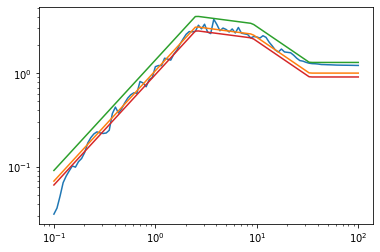

In [23]:
plt.loglog(freq,rs2);
plt.loglog(freq,resp_spec);
plt.loglog(freq,resp_spec_u);
plt.loglog(freq,resp_spec_l);

In [24]:
new_th = th2*(np.linalg.norm(th)/np.linalg.norm(th2));

C:\Users\OWNER\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\OWNER\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\OWNER\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\OWNER\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


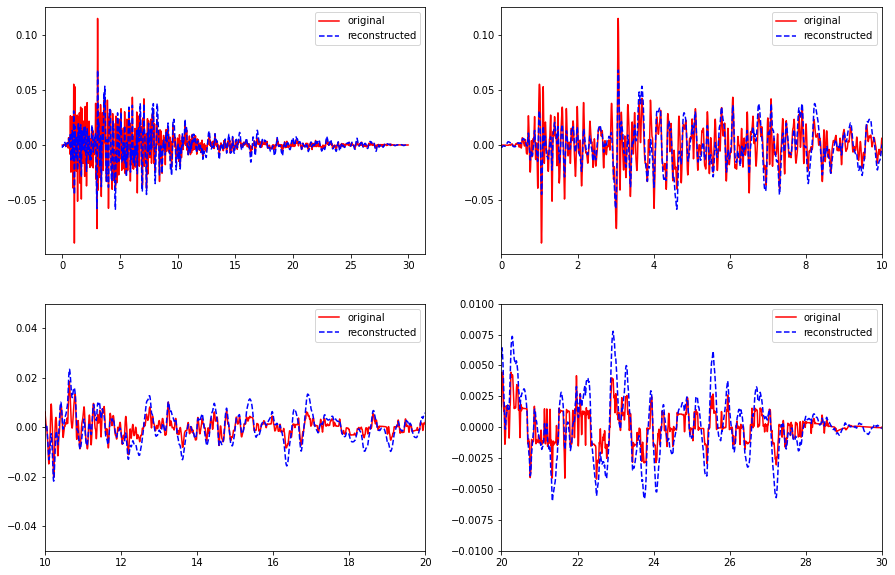

In [25]:
plt.figure(figsize=(15,10));
plt.subplot(221);
plt.plot(time,th,color='red',linestyle='solid',label='original');
plt.plot(time,new_th,color='blue',linestyle='dashed',label='reconstructed');
plt.legend();
plt.subplot(222);
plt.plot(time,th,color='red',linestyle='solid',label='original');
plt.plot(time,new_th,color='blue',linestyle='dashed',label='reconstructed');
plt.xlim(0,10);
plt.legend();
plt.subplot(223);
plt.plot(time,th,color='red',linestyle='solid',label='original');
plt.plot(time,new_th,color='blue',linestyle='dashed',label='reconstructed');
plt.xlim(10,20);
plt.ylim(-0.05,0.05);
plt.legend();
plt.subplot(224);
plt.plot(time,th,color='red',linestyle='solid',label='original');
plt.plot(time,new_th,color='blue',linestyle='dashed',label='reconstructed');
plt.xlim(20,30);
plt.ylim(-0.01,0.01);
plt.legend();